<a href="https://colab.research.google.com/github/ltoosaint24/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Loveline_Toussaint_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

dfz = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(dfz.shape)
dfz.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [13]:
df = dfz.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [14]:
# Perform K-Means Clustering on the Dataset
dataset = pd.DataFrame(df.sample(50))
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
204,87930,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,0.3961,1.044,2.497,30.29,0.006953,0.01911,0.027010,0.010370,0.01782,0.003586,14.97,24.64,96.05,677.9,0.14260,0.23780,0.26710,0.10150,0.3014,0.08750,NaN
96,86211,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,0.3661,1.511,2.410,24.44,0.005433,0.01179,0.011310,0.015190,0.02220,0.003408,12.83,20.92,82.14,495.2,0.11400,0.09358,0.04980,0.05882,0.2227,0.07376,NaN
441,909445,17.270,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.05736,0.1467,0.05407,0.5100,1.679,3.283,58.38,0.008109,0.04308,0.049420,0.017420,0.01594,0.003739,20.38,35.46,132.80,1284.0,0.14360,0.41220,0.50360,0.17390,0.2500,0.07944,NaN
273,8910996,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,0.2081,0.06312,0.2684,1.409,1.750,16.39,0.013800,0.01067,0.008347,0.009472,0.01798,0.004261,10.75,20.88,68.09,355.2,0.14670,0.09370,0.04043,0.05159,0.2841,0.08175,NaN
298,892214,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,0.2300,0.669,1.661,20.56,0.003169,0.01377,0.010790,0.005243,0.01103,0.001957,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,NaN


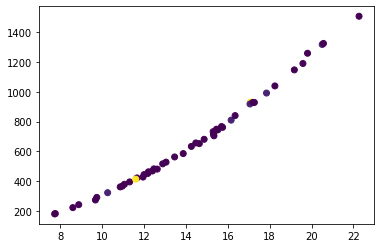

In [15]:
plt.scatter(dataset['radius_mean'], dataset['area_mean'], c = dataset['id'])

In [16]:
#K-MEAN clustering

dataset_centroid = df.radius_mean.mean()
datasent_centroid_y = df.area_mean.mean()

In [17]:
dataset_centroid, datasent_centroid_y

(14.127291739894563, 654.8891036906857)

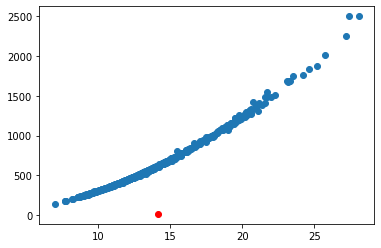

In [18]:
plt.scatter(df.radius_mean, df.area_mean)
plt.plot(dataset_centroid, dataset_centroid, "or")

In [19]:
#sample data for standardization
centeroid = df.sample(5)
centeroid =centeroid.reset_index(drop = True)
centeroid

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,921644,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,0.3031,1.3850,2.177,27.41,0.004775,0.011720,0.019470,0.012690,0.01870,0.002626,16.51,32.29,107.40,826.4,0.10600,0.1376,0.16110,0.10950,0.2722,0.06956,NaN
1,915186,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,0.4076,1.0930,3.014,20.04,0.009783,0.045420,0.034830,0.021880,0.02542,0.010450,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520,NaN
2,88411702,13.750,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,0.05429,0.4347,1.0570,2.829,39.93,0.004351,0.026670,0.033710,0.010070,0.02598,0.003087,15.01,26.34,98.00,706.0,0.09368,0.1442,0.13590,0.06106,0.2663,0.06321,NaN
3,891923,13.770,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,0.2191,0.6946,1.479,17.74,0.004348,0.008153,0.004272,0.006829,0.02154,0.001802,14.67,16.93,94.17,661.1,0.11700,0.1072,0.03732,0.05802,0.2823,0.06794,NaN
4,846381,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.050510,0.019920,0.02981,0.003002,16.84,27.66,112.00,876.5,0.11310,0.1924,0.23220,0.11190,0.2809,0.06287,NaN


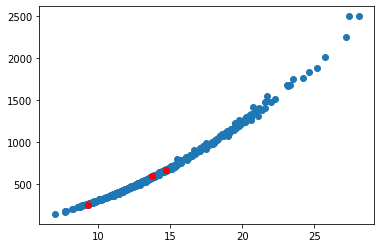

In [20]:
plt.scatter(df.radius_mean, df.area_mean)
plt.plot(centeroid.iloc[0].radius_mean, centeroid.iloc[0].area_mean, "or")
plt.plot(centeroid.iloc[1].radius_mean, centeroid.iloc[1].area_mean, "or")
plt.plot(centeroid.iloc[2].radius_mean, centeroid.iloc[2].area_mean, "or")

In [21]:
#KMEAN cluster
feat =['radius_mean', 'area_mean']


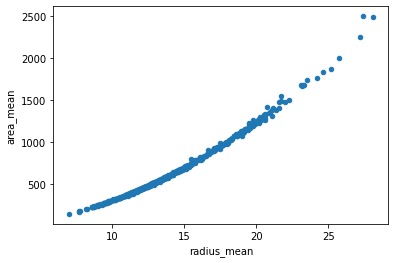

In [22]:
df[feat].plot(kind ='scatter', x= feat[0], y= feat[1])

In [23]:
 k=3
 monel =KMeans(n_clusters= k, max_iter= 1)

In [25]:
monel.fit(df[feat].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
df['clusters'] = monel.labels_

In [27]:
centeoid = monel.labels_

In [28]:
frame = pd.DataFrame(centeoid)
frame.head()

,0
0,2
1,1
2,1
3,0
4,1


In [29]:
base_c =['purple', 'indigo','orange']
colorss = [base_c[centeoid] for centeoid in monel.labels_]

KeyError: ignored

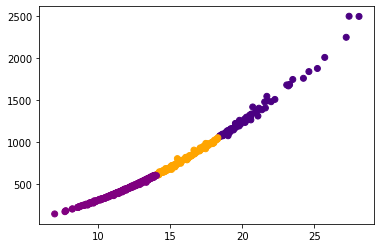

In [30]:
fig, ax = plt.subplots()
ax.scatter(df[feat[0]], df[feat[1]], c = colorss)
ax.scatter(frame[0],frame[1],  c = base_c, s=100) #there was error brought by the centeroid data frame, there was on an x -index provided

In [31]:
#K mean cluster withbdata set
features = ['texture_mean', 'perimeter_mean']

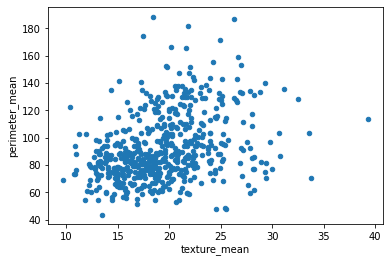

In [32]:
df[features].plot(kind ="scatter", x =features[0], y= features[1])

In [33]:
k = 3
mode = KMeans(n_clusters= k , max_iter= 1)

In [34]:
mode.fit(df[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
df['cluster']=mode.labels_

In [36]:
centeroids = mode.labels_

In [37]:
centerframe =pd.DataFrame(centeroids)
centerframe.head()

,0
0,1
1,1
2,1
3,2
4,1


In [38]:
base_colors = ['r','b','y']
colors = [base_colors[centeroids] for centeroids in mode.labels_]

KeyError: ignored

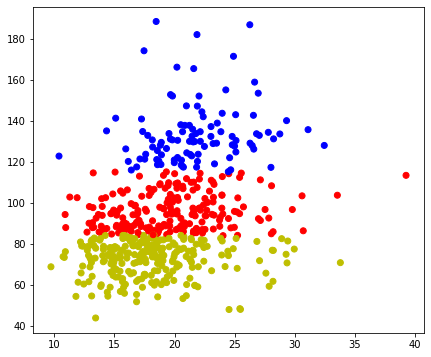

In [39]:
fig, ax = plt.subplots(figsize =(7,6))
ax.scatter(df[features[0]], df[features[1]], c = colors)
ax.scatter(centerframe[0],centerframe[1], c = base_colors, s=100);

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [40]:
# Your Code Here
datas = dfz.sample(50)
datas

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
43,856106,M,13.280,20.28,87.32,545.2,0.10410,0.14360,0.098470,0.061580,0.1974,0.06782,0.3704,0.8249,2.4270,31.330,0.005072,0.021470,0.021850,0.009560,0.017190,0.003317,17.380,28.00,113.10,907.2,0.15300,0.37240,0.366400,0.14920,0.3739,0.10270,NaN
469,911366,B,11.620,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,0.4101,1.7400,3.0270,27.850,0.014590,0.032060,0.049610,0.018410,0.018070,0.005217,13.360,25.40,88.14,528.1,0.17800,0.28780,0.318600,0.14160,0.2660,0.09270,NaN
341,898143,B,9.606,16.84,61.64,280.5,0.08481,0.09228,0.084220,0.022920,0.2036,0.07125,0.1844,0.9429,1.4290,12.070,0.005954,0.034710,0.050280,0.008510,0.017500,0.004031,10.750,23.07,71.25,353.6,0.12330,0.34160,0.434100,0.08120,0.2982,0.09825,NaN
372,9012795,M,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183,0.3414,1.3090,2.4070,39.060,0.004426,0.026750,0.034370,0.013430,0.016750,0.004367,22.690,21.84,152.10,1535.0,0.11920,0.28400,0.402400,0.19660,0.2730,0.08666,NaN
110,864033,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.017780,0.1584,0.07065,0.4030,1.4240,2.7470,22.870,0.013850,0.029320,0.027220,0.010230,0.032810,0.004638,11.050,21.47,71.68,367.0,0.14670,0.17650,0.130000,0.05334,0.2533,0.08468,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.22100,0.4366,0.20750,NaN
118,864877,M,15.780,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,0.5520,1.0720,3.5980,58.630,0.008699,0.039760,0.059500,0.013900,0.014950,0.005984,20.190,30.50,130.30,1272.0,0.18550,0.49250,0.735600,0.20340,0.3274,0.12520,NaN
525,91805,B,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,0.1678,0.07126,0.1267,0.6793,1.0690,7.254,0.007897,0.017620,0.018010,0.007320,0.015920,0.003925,9.473,18.45,63.30,275.6,0.16410,0.22350,0.175400,0.08512,0.2983,0.10490,NaN
167,8712729,M,16.780,18.80,109.30,886.3,0.08865,0.09182,0.084220,0.065760,0.1893,0.05534,0.5990,1.3910,4.1290,67.340,0.006123,0.024700,0.026260,0.016040,0.020910,0.003493,20.050,26.30,130.70,1260.0,0.11680,0.21190,0.231800,0.14740,0.2810,0.07228,NaN
542,921644,B,14.740,25.42,94.70,668.6,0.08275,0.07214,0.041050,0.030270,0.1840,0.05680,0.3031,1.3850,2.1770,27.410,0.004775,0.011720,0.019470,0.012690,0.018700,0.002626,16.510,32.29,107.40,826.4,0.10600,0.13760,0.161100,0.10950,0.2722,0.06956,NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


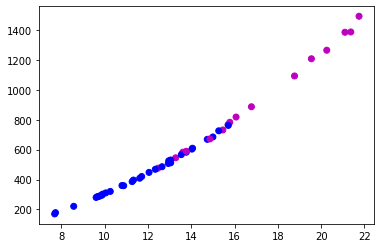

In [41]:
plt.scatter(datas['radius_mean'], datas['area_mean'], c = datas['diagnosis'])

In [42]:
k= 3
mos= KMeans(n_clusters = k, max_iter= 1) 

In [43]:
mos.fit(datas[feat].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
datas['cluster']= mos.labels_

In [45]:
centroid = mos.labels_

In [46]:
cet = pd.DataFrame(centroid)
cet.head()

,0
0,2
1,0
2,0
3,1
4,0


In [ ]:
#The data group by diagnosis cause a more wider distribution spread within the data clusters, compared to that based of id

In [47]:
datas['cluster'].isnull().sum()

0

In [48]:
datas['cluster'].value_counts() # This would equate to 100% accuracy, being that it was indicated that tgere non null values in the observed labels

2    25
0    19
1     6
Name: cluster, dtype: int64

In [49]:
base_colors = ['r','b','y']
colors = [base_colors[centroids] for centroids in mos.labels_]

KeyError: ignored

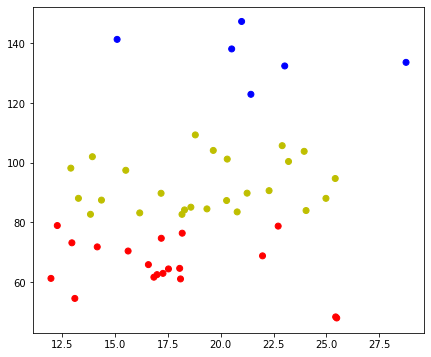

In [50]:
fig, ax = plt.subplots(figsize =(7,6))
ax.scatter(datas[features[0]], datas[features[1]], c = colors)
ax.scatter(cet[0],cet[1], c = base_colors, s=100);

In [51]:
df['cluster'].isnull().sum()

0

In [52]:
df['cluster'].value_counts() #This equate to total number of indexes which also mean that the non-diagnosis data frame is alsom100% accurate

2    261
0    207
1    101
Name: cluster, dtype: int64

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [59]:
##### Your Code Here #####
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [55]:
feats = list(df[features].columns)
feats

['texture_mean', 'perimeter_mean']

In [61]:
scale_data = scaler.fit_transform(df[features])

In [63]:
scale_data[:5]

array([[-2.07333501,  1.26993369],
       [-0.35363241,  1.68595471],
       [ 0.45618695,  1.56650313],
       [ 0.25373211, -0.59268717],
       [-1.15181643,  1.77657315]])

In [64]:
df_scale = pd.DataFrame(scale_data, columns = features) #scalars are used to standardized data
df_scale.head()

,texture_mean,perimeter_mean
0,-2.073335,1.269934
1,-0.353632,1.685955
2,0.456187,1.566503
3,0.253732,-0.592687
4,-1.151816,1.776573


In [65]:
df_scale[features].std()

texture_mean      1.00088
perimeter_mean    1.00088
dtype: float64

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)


In [68]:
pca_features = pca.fit_transform(df_scale)
pca_features[:5]

array([[-0.56809053, -2.36404797],
       [ 0.94209413, -1.44220588],
       [ 1.43025787, -0.7851121 ],
       [-0.23967742,  0.59850881],
       [ 0.44176971, -2.07068413]])

In [69]:
pca.explained_variance_ratio_

array([0.66476653, 0.33523347])

In [70]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

In [75]:
df_pca = pd.DataFrame(pca_features, columns =['Radius Mean', 'Area Mean'])
df_pca.head()

,Radius Mean,Area Mean
0,-0.568091,-2.364048
1,0.942094,-1.442206
2,1.430258,-0.785112
3,-0.239677,0.598509
4,0.441770,-2.070684


In [73]:
k= 3
model = KMeans(n_clusters = k, max_iter = 1)

In [74]:
model.fit(df_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [76]:
df_pca['cluster'] = model.labels_

In [78]:
cenroid = model.cluster_centers_

In [79]:
ccu = pd.DataFrame(cenroid)
ccu.head()

,0,1
0,-0.880093,-0.175767
1,0.416321,0.843949
2,1.504839,-0.689125


In [84]:
base_colors = ['r','g', 'b']
colors = [base_colors[cenroid] for cenroid in model.labels_]

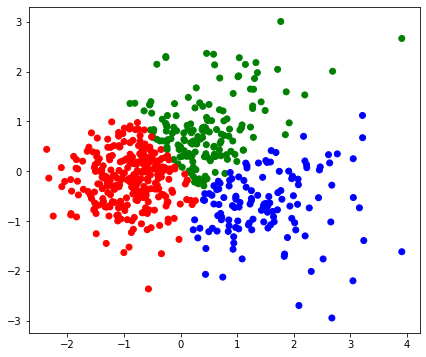

In [85]:
fig, ax = plt.subplots(figsize = (7,6))
ax.scatter(df_pca['Radius Mean'], df_pca['Area Mean'], c = colors)
ax.scatter(ccu[0], ccu[1], c = base_colors, s =100);

In [87]:
#silhouette score
from sklearn import metrics
metrics.silhouette_score(df[features], model.labels_, metric='euclidean')

0.23652671604338618

In [88]:
model.labels_

array([0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1,
       1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,

In [ ]:
#PCA1

In [91]:
pca1 = PCA(n_components = 1)

In [96]:
pca1_features = pca1.fit_transform(df_scale)
pca1_features[:5]

array([[-0.56809053],
       [ 0.94209413],
       [ 1.43025787],
       [-0.23967742],
       [ 0.44176971]])

In [93]:
pca1.explained_variance_ratio_

array([0.66476653])

In [94]:
sum(pca1.explained_variance_ratio_)

0.6647665293432848

In [95]:
sum(pca1.explained_variance_ratio_)

0.6647665293432848

In [99]:
df_pca1 = pd.DataFrame(pca1_features, columns = ['Radius Mean'])
df_pca1.head()

,Radius Mean
0,-0.568091
1,0.942094
2,1.430258
3,-0.239677
4,0.441770


In [101]:
k =3
mode = KMeans(n_clusters = k, max_iter = 1)

In [102]:
mode.fit(df_pca1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [105]:
df_pca1['cluster'] = mode.labels_
centrid = model.cluster_centers_

In [106]:
ccua = pd.DataFrame(centrid)
ccua.head()

,0,1
0,-0.880093,-0.175767
1,0.416321,0.843949
2,1.504839,-0.689125


In [107]:
base_c = ['purple','indigo', 'green']
colors = [base_c[centrid] for centrid in mode.labels_]

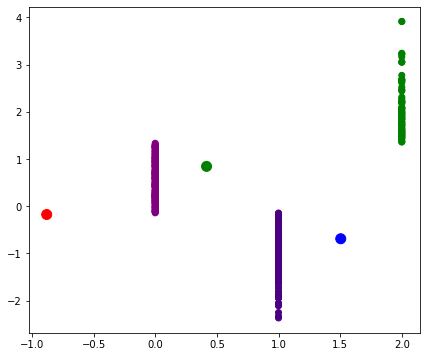

In [113]:
fig,ax = plt.subplots(figsize =(7,6))
ax.scatter(df_pca1['cluster'],df_pca1['Radius Mean'], c =colors)
ax.scatter(ccua[0],ccua[1],  c = base_colors, s =100)
#PCA with a component sample of 1 seem to produce linear clusters, while PCA with a components of 2 prouces clusters.

In [116]:
#Accuracy Score:
df_pca1['Radius Mean'].isnull().sum() #there are any null values in the data set, which indicate a complet data group

0

In [117]:
len(df_pca1)/ len(df_pca1) # This indicate that data group is about 100% accurate, however there may be miss print data values, that would can be determine by actual data logged and records

1.0

In [118]:
df_pca.isnull().sum()# this also true statement for PCA1 c data values because of the lack of data values.

Radius Mean    0
Area Mean      0
cluster        0
dtype: int64

In [119]:
#Silhouett Score PCA2 :

metrics.silhouette_score(df_pca, model.labels_, metric = 'euclidean')

0.5081836296737615

In [120]:
#Silhouett Score PCA1
metrics.silhouette_score(df_pca1, mode.labels_, metric = 'euclidean') # There was higher metric store within the single component group.

0.7187549151253734

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project